# Seyed Mohammad Amin Atyabi - 830402014

# Linear Separability

**1**

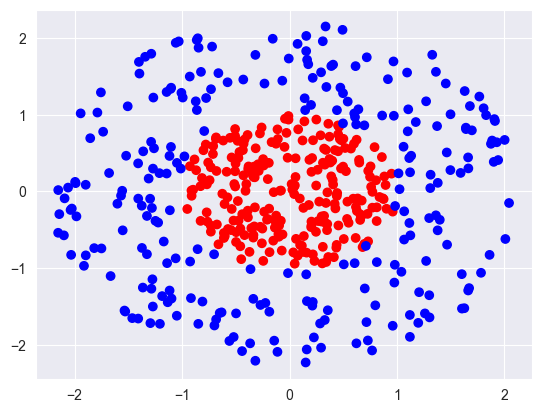

In [47]:
import numpy
from matplotlib import pyplot as plt


def random_point(radius, radius_start):
    alpha = 2 * numpy.pi * numpy.random.random()
    r = radius * numpy.sqrt(numpy.random.random() + (radius_start / 4))
    x = r * numpy.cos(alpha)
    y = r * numpy.sin(alpha)
    return x, y


color = {'r': 0.0, 'b': 1.0}

point_count = 250
X = []
Y = []
Z = []
for i in range(point_count):
    x, y = random_point(1, 0)
    X.append(x)
    Y.append(y)
    Z.append('r')

for i in range(point_count):
    x, y = random_point(2, 1)
    X.append(x)
    Y.append(y)
    Z.append('b')

data = numpy.array([X, Y])
Z = numpy.array(Z)

plt.scatter(data[0], data[1], color=Z)
plt.show()

**2**

In this section we have implemented logistic regression classifier

In order to achieve this, first we needed sigmoid function as our base function for classification

$$ sig(z) = \frac {1}{1 + e^{-z}} $$

Then using sigmoid function we update $\theta$ in each round

Theta: [0.02431849 0.01800627 0.06807517]
Accuracy: 0.418


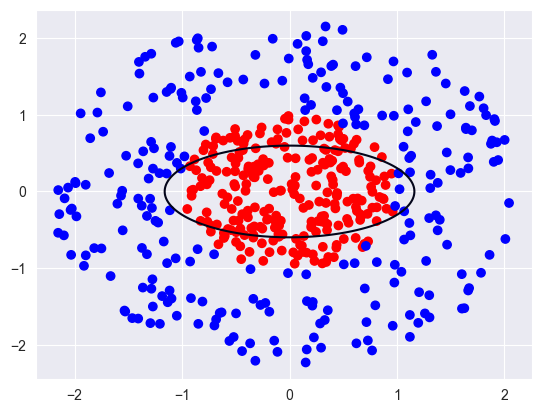

In [48]:
from sklearn.metrics import accuracy_score

label = Z.copy()
label[label == 'r'] = color['r']
label[label == 'b'] = color['b']
label = label.astype(float)


def sigmoid(x, theta):
    return 1 / (1 + numpy.exp(-numpy.dot(x, theta)))

def gradient_descent(theta, X, y, learning_rate, iterations):
    m = X.shape[0]
    for _ in range(iterations):
        h = sigmoid(X, theta)
        error = h - y
        delta_theta = (1 / m) * numpy.dot(X.T, error)
        theta -= learning_rate * delta_theta
    return theta


theta = numpy.random.rand(3)

learning_rate = 0.01
num_iterations = 1000

data = numpy.array([numpy.full(shape=500, fill_value=1, dtype=int), data[0], data[1]]).transpose()

theta = gradient_descent(theta, data, label, learning_rate, num_iterations)
print(f'Theta: {theta}')

y_pred = numpy.round(sigmoid(data, theta))

accuracy = accuracy_score(label, y_pred)
print(f'Accuracy: {accuracy}')

plt.scatter(data.transpose()[1], data.transpose()[2], color=Z)

x = numpy.linspace(-2.0, 2.0, 1000)
y = numpy.linspace(-2.0, 2.0, 1000)
X, Y = numpy.meshgrid(x, y)
F = (theta[1] * (X ** 2)) + (theta[2] * (Y ** 2)) - theta[0]
plt.contour(X, Y, F, [0])
plt.show()

# Predict Car Price Using Linear Regression

**1**

In this section first we load our data then to make process more convenient in next sections, we decided to convert *Max Power* and *Max Torque* columns
and extract their data in separate columns

Then in order to be able to use stratify method in `train_test_split` I made price_cat column and put each car in a price category

In [3]:
import pandas

car_data = pandas.read_csv('data/car details v4.csv')

car_data['Engine'] = car_data['Engine'].str.replace(' cc', '')
car_data['Engine'] = pandas.to_numeric(car_data['Engine'], errors='coerce', downcast='integer')

pattern_pw = r'(\d+)(?:\s*bhp)?\s*@\s*(\d+)(?:\s*rpm)?'
car_data[['Power', 'Power RPM']] = car_data['Max Power'].str.extract(pattern_pw).astype(float)

pattern_trq = r'(\d+)(?:\s*Nm)?\s*@\s*(\d+)(?:\s*rpm)?'
car_data[['Torque', 'Torque RPM']] = car_data['Max Torque'].str.extract(pattern_trq).astype(float)

car_data = car_data.drop(columns=['Max Power', 'Max Torque'])

car_data.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM
count,2.059000e+03,2059.000000,2.059000e+03,1979.000000,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000,1975.000000,1975.000000,1979.000000,1979.000000
mean,1.702992e+06,2016.425449,5.422471e+04,1692.575543,4280.860652,1767.991980,1591.735338,5.306266,52.002210,129.538734,4835.093671,308.453765,2619.545225
std,2.419881e+06,3.363564,5.736172e+04,643.736294,442.458507,135.265825,136.073956,0.822170,15.110198,65.153364,1097.368548,675.608440,1206.314770
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,7.000000,2910.000000,8.000000,150.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1197.000000,3985.000000,1695.000000,1485.000000,5.000000,41.250000,83.000000,4000.000000,115.000000,1600.000000
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000,116.000000,4200.000000,200.000000,1900.000000
75%,1.925000e+06,2019.000000,7.200000e+04,1995.000000,4629.000000,1831.500000,1675.000000,5.000000,60.000000,171.000000,6000.000000,350.000000,4000.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,660.000000,8250.000000,7619.000000,6500.000000


In [4]:
car_data['price_cat'] = numpy.select(
    [car_data['Price'] >= 1925000,
     car_data['Price'] <= 490000,
     car_data['Price'].between(490000, 825000),
     car_data['Price'].between(825000, 1925000)],
    ['0', '1', '2', '3'],
    numpy.nan
)

car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM,price_cat
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0,2
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0,1
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0,1
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0,2
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,330.0,1600.0,3
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0,1
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,3795.0,1680.0,1427.0,5.0,45.0,70.0,6250.0,102.0,4000.0,1
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,4936.0,1868.0,1479.0,5.0,65.0,188.0,4000.0,400.0,1750.0,0


In [5]:
from sklearn.model_selection import train_test_split

car_feature = car_data.drop(columns=['Price'])
car_price = car_data['Price']

x_train, x_test, y_train, y_test = train_test_split(car_feature, car_price, test_size=0.2, stratify=car_feature['price_cat'])

**2**

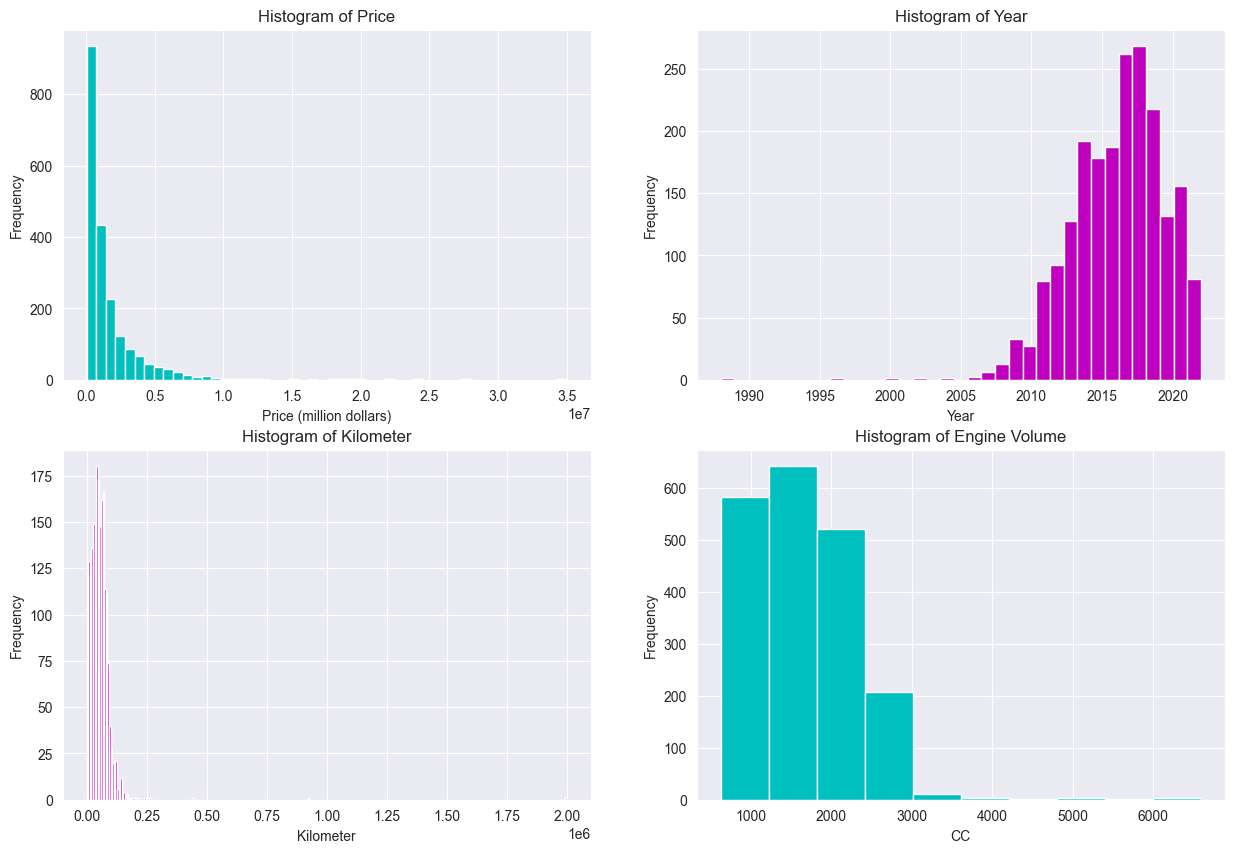

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(car_data['Price'], bins=50, color='c')
plt.title('Histogram of Price')
plt.xlabel('Price (million dollars)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(car_data['Year'], bins=35, color='m')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(car_data['Kilometer'], bins=300, color='m')
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(car_data['Engine'], bins=10, color='c')
plt.title('Histogram of Engine Volume')
plt.xlabel('CC')
plt.ylabel('Frequency')

plt.show()

In [7]:
car_model_mean_price = car_data.groupby(['Model'])['Price'].mean().astype(int).reset_index()
car_model_mean_price

,Model,Price
0,2 Series Gran Coupe 220d M Sport [2020-2021],4200000
1,3-Series 320d,800000
2,3-Series 320d Highline Sedan,1200000
3,3-Series 320d Luxury Edition,4550000
4,3-Series 320d Luxury Line,2534374
...,...,...
1045,i20 Magna 1.4 CRDI,340000
1046,i20 Sportz 1.2,375000
1047,i20 Sportz 1.2 (O),305000
1048,i20 Sportz 1.2 BS-IV,350000


**3**

By exploring the dataset I've found removing rows with no data is best method because the rows having missing value have had many of their columns missed

In [8]:
print(car_data.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Power                  84
Power RPM              84
Torque                 80
Torque RPM             80
price_cat               0
dtype: int64


In [9]:
print(car_data.isnull().mean() * 100)

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
Power                 4.079650
Power RPM             4.079650
Torque                3.885381
Torque RPM            3.885381
price_cat             0.000000
dtype: float64


In [10]:
car_data_count_before_delete = len(car_data)
car_data.dropna(subset=['Drivetrain', 'Fuel Tank Capacity', 'Power'], inplace=True)
car_data_count_after_delete = len(car_data)
print(f'{car_data_count_before_delete - car_data_count_after_delete} Entity lost')

187 Entity lost


**4**

To calculate confusion matrix I have to convert every categorical and nominal value to numeric value

In [11]:
from sklearn.preprocessing import LabelEncoder

car_model_encoder = LabelEncoder()
car_make_encoder = LabelEncoder()
car_color_encoder = LabelEncoder()
car_location_encoder = LabelEncoder()
car_drivetrain_encoder = LabelEncoder()
car_fuel_encoder = LabelEncoder()
car_transmission_encoder = LabelEncoder()
car_owner_encoder = LabelEncoder()
car_seller_encoder = LabelEncoder()

car_data['Model'] = car_model_encoder.fit_transform(car_data['Model'])
car_data['Make'] = car_make_encoder.fit_transform(car_data['Make'])
car_data['Color'] = car_color_encoder.fit_transform(car_data['Color'])
car_data['Location'] = car_location_encoder.fit_transform(car_data['Location'])
car_data['Drivetrain'] = car_drivetrain_encoder.fit_transform(car_data['Drivetrain'])
car_data['Fuel Type'] = car_fuel_encoder.fit_transform(car_data['Fuel Type'])
car_data['Transmission'] = car_transmission_encoder.fit_transform(car_data['Transmission'])
car_data['Owner'] = car_owner_encoder.fit_transform(car_data['Owner'])
car_data['Seller Type'] = car_seller_encoder.fit_transform(car_data['Seller Type'])

car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM,price_cat
0,7,92,505000,2017,87150,5,1,55,7,0,...,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0,2
1,18,730,450000,2014,75000,2,1,40,14,1,...,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0,1
2,8,939,220000,2011,67000,5,1,39,8,0,...,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0,1
3,29,452,799000,2019,37500,5,1,41,12,0,...,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0,2
4,29,502,1950000,2018,69000,2,1,45,7,0,...,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,18,640,245000,2014,79000,5,1,20,14,1,...,3775.0,1680.0,1620.0,5.0,43.0,85.0,6000.0,113.0,4500.0,1
2054,17,913,850000,2016,90300,2,1,65,14,0,...,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,330.0,1600.0,3
2055,8,378,275000,2014,83000,5,1,1,14,1,...,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0,1
2056,6,417,240000,2013,73000,5,1,66,13,0,...,3795.0,1680.0,1427.0,5.0,45.0,70.0,6250.0,102.0,4000.0,1


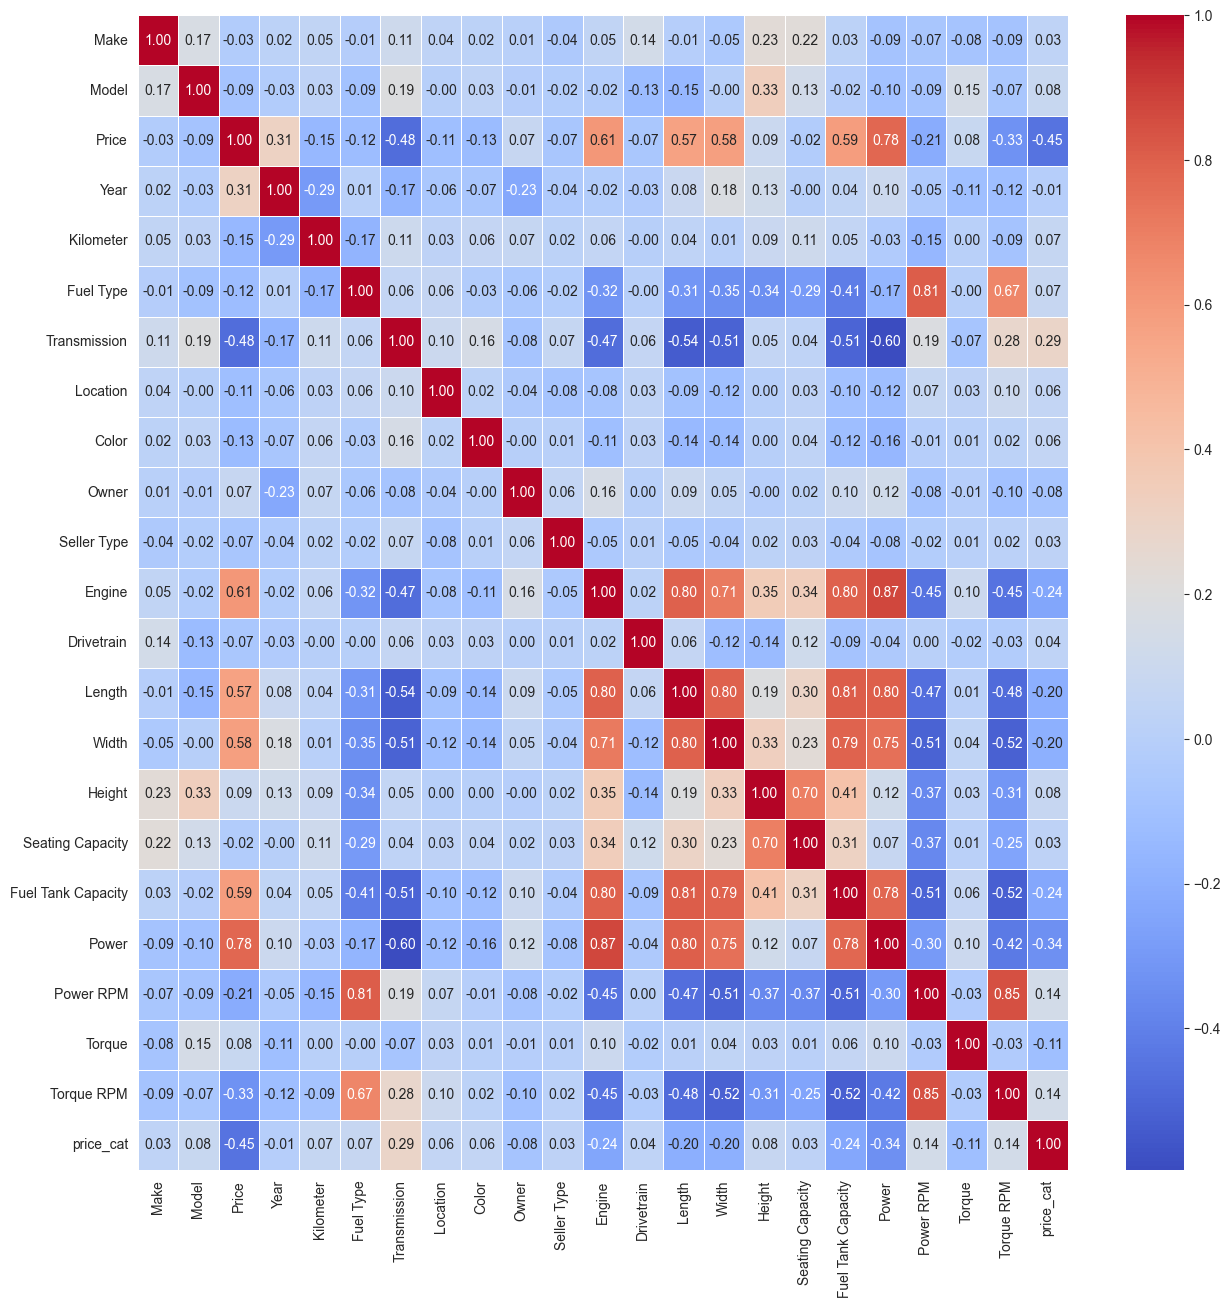

In [12]:
import seaborn

plt.figure(figsize=(15, 15))
seaborn.heatmap(car_data.corr(), annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.show()

**5**

As I mentioned, converted in previous part

**6**

In [13]:
import warnings
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso

car_feature = car_data.drop(columns=['Price'])
car_price = car_data['Price']

x_train, x_test, y_train, y_test = train_test_split(car_feature, car_price, test_size=0.2, stratify=car_feature['price_cat'])

warnings.filterwarnings('ignore')

cv = KFold(n_splits=5, shuffle=True)
parameters = {'alpha': numpy.linspace(0, 1, 100)}

lasso = Lasso()

gscv_lasso = GridSearchCV(lasso, parameters, scoring='r2', cv=cv)
gscv_lasso_results = gscv_lasso.fit(x_train, y_train)

print(f'Lasso R2 Score : {gscv_lasso_results.best_score_}')
print(f'Lasso Best Parameter : {gscv_lasso_results.best_params_}')

Lasso R2 Score : 0.7178120571798112
Lasso Best Parameter : {'alpha': 1.0}


In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge()

gscv_ridge = GridSearchCV(ridge, parameters, scoring='r2', cv=cv)
gscv_ridge_results = gscv_ridge.fit(x_train, y_train)

print(f'Ridge R2 Score : {gscv_ridge_results.best_score_}')
print(f'Ridge Best Parameter : {gscv_ridge_results.best_params_}')

Ridge R2 Score : 0.6904303087294259
Ridge Best Parameter : {'alpha': 1.0}


**7**

$$ R^2 = 1 - \frac {\Sigma  (y_i - \hat{y})^2} {\Sigma  (y_i - \bar{y})^2} $$

$$ RMSE =  \sqrt{MSE} = \sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y})^2 } $$

In [15]:
from sklearn.metrics import get_scorer

y_pred_lasso = gscv_lasso.predict(x_test)
y_pred_ridge = gscv_ridge.predict(x_test)

scorer = get_scorer('r2')
lasso_r2_score = scorer(gscv_lasso, x_test, y_test)
ridge_r2_score = scorer(gscv_ridge, x_test, y_test)

scorer = get_scorer('neg_root_mean_squared_error')
lasso_rmse_score = scorer(gscv_lasso, x_test, y_test)
ridge_rmse_score = scorer(gscv_ridge, x_test, y_test)

print(f'Lasso R2 Score : {lasso_r2_score}')
print(f'Ridge R2 Score : {ridge_r2_score}')
print(f'Lasso Rmse Score : {abs(lasso_rmse_score)}')
print(f'Ridge Rmse Score : {abs(ridge_rmse_score)}')

Lasso R2 Score : 0.6601343558010873
Ridge R2 Score : 0.6603451475586883
Lasso Rmse Score : 1132533.4980997727
Ridge Rmse Score : 1132182.2331833292


# Bayesian Network

![Bayesian Network](res/BN.png)

**A**

<img src="res/BN_1.jpg" width="1280">

**B**

<img src="res/BN_2.jpg" width="1280">

# Customer Churn Prediction

**Pre Process**

In [16]:
customer_data = pandas.read_csv('data/customer_churn.csv')

customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
customer_data.loc[customer_data['TotalCharges'] == ' ', ['TotalCharges']] = customer_data[customer_data['TotalCharges'] == ' ']['MonthlyCharges']

customer_data['TotalCharges'] = customer_data['TotalCharges'].astype(float)

In [19]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
print(customer_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [22]:
customer_gender_encoder = LabelEncoder()
customer_partner_encoder = LabelEncoder()
customer_dependent_encoder = LabelEncoder()
customer_phone_service_encoder = LabelEncoder()
customer_multiple_liens_encoder = LabelEncoder()
customer_internet_service_encoder = LabelEncoder()
customer_sec_encoder = LabelEncoder()
customer_backup_encoder = LabelEncoder()
customer_device_protection_encoder = LabelEncoder()
customer_tech_encoder = LabelEncoder()
customer_stream_tv_encoder = LabelEncoder()
customer_stream_mov_encoder = LabelEncoder()
customer_cont_encoder = LabelEncoder()
customer_paperless_encoder = LabelEncoder()
customer_payment_encoder = LabelEncoder()
customer_churn_encoder = LabelEncoder()

customer_data['gender'] =  customer_gender_encoder.fit_transform(customer_data['gender'])
customer_data['Partner'] =  customer_partner_encoder.fit_transform(customer_data['Partner'])
customer_data['Dependents'] =  customer_dependent_encoder.fit_transform(customer_data['Dependents'])
customer_data['PhoneService'] =  customer_phone_service_encoder.fit_transform(customer_data['PhoneService'])
customer_data['MultipleLines'] =  customer_multiple_liens_encoder.fit_transform(customer_data['MultipleLines'])
customer_data['InternetService'] =  customer_internet_service_encoder.fit_transform(customer_data['InternetService'])
customer_data['OnlineSecurity'] =  customer_sec_encoder.fit_transform(customer_data['OnlineSecurity'])
customer_data['OnlineBackup'] =  customer_backup_encoder.fit_transform(customer_data['OnlineBackup'])
customer_data['DeviceProtection'] =  customer_device_protection_encoder.fit_transform(customer_data['DeviceProtection'])
customer_data['TechSupport'] =  customer_tech_encoder.fit_transform(customer_data['TechSupport'])
customer_data['StreamingTV'] =  customer_stream_tv_encoder.fit_transform(customer_data['StreamingTV'])
customer_data['StreamingMovies'] = customer_stream_mov_encoder.fit_transform(customer_data['StreamingMovies'])
customer_data['Contract'] = customer_cont_encoder.fit_transform(customer_data['Contract'])
customer_data['PaperlessBilling'] = customer_paperless_encoder.fit_transform(customer_data['PaperlessBilling'])
customer_data['PaymentMethod'] = customer_payment_encoder.fit_transform(customer_data['PaymentMethod'])
customer_data['Churn'] = customer_churn_encoder.fit_transform(customer_data['Churn'])

customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


**Naive Bayes Classifier**

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(customer_data.drop(columns=['Churn', 'customerID']), customer_data['Churn'], test_size=0.3)

naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

nb_predicted = naive_bayes.predict(x_test)

confusion_matrix(y_test, nb_predicted)

array([[1129,  401],
       [ 142,  441]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

nb_acc =  accuracy_score(y_test, nb_predicted)
nb_precision =  precision_score(y_test, nb_predicted)
nb_recall =  recall_score(y_test, nb_predicted)
nb_f1 =  f1_score(y_test, nb_predicted)

print('Accuracy:', nb_acc)
print('Precision:', nb_precision)
print('Recall:', nb_recall)
print('F1 Score:', nb_f1)

Accuracy: 0.7430194036914339
Precision: 0.5237529691211401
Recall: 0.7564322469982847
F1 Score: 0.6189473684210526


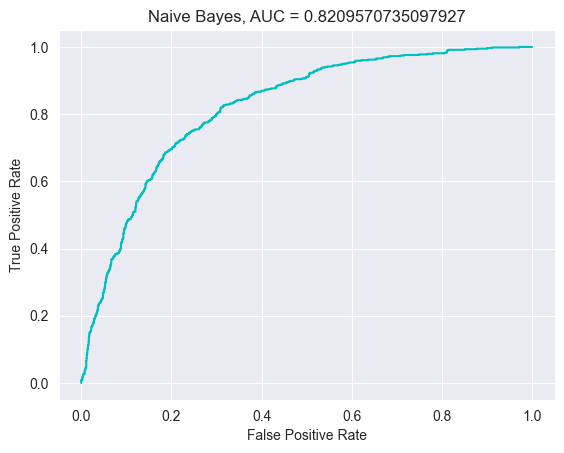

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

nb_predicted_prob = naive_bayes.predict_proba(x_test)[::, 1]
nb_fp_rate, nb_tp_rate, _ = roc_curve(y_test, nb_predicted_prob)
nb_auc = roc_auc_score(y_test, nb_predicted_prob)
plt.plot(nb_fp_rate, nb_tp_rate, color='c')
plt.title(f'Naive Bayes, AUC = {nb_auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Kernel Trick

**1**

$$ K(x_i,x_j) = e^{-\frac{1}{2}||x_i - x_j||^2} $$

$$ If K is Kernel \Longrightarrow{} K(x,y) =  \varphi{(x)}.\varphi{(y)} $$

# Support Vector Machine

**Linear** : A linear kernel should be used if the data is linearly separable or has many features

**RBF** : An RBF kernel should be used if it has complex and nonlinear patterns or clusters

**Sigmoid** : A sigmoid kernel should be used if it is binary or looks like a logistic function

**Polynomial** : A polynomial kernel should be used if it has nonlinear patterns or interactions between features